# Importing all the required libraries

In [5]:
import numpy as np 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import matplotlib.pyplot as plt


# Downloading stopwords and punkt 

In [6]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to D:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to D:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Reading training dataset and validation dataset

In [7]:
tdf=pd.read_csv('twitter_training.csv')
vdf=pd.read_csv('twitter_validation.csv')


# Renaming column names of training dataset and validation dataset

In [8]:
tdf.columns=['id','info','type','review',]
vdf.columns=['id','info','type','review',]



# Displaying first 5 rows of training dataset

In [9]:
tdf.head()

,id,info,type,review
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


# Displaying first 5 rows of validation dataset

In [10]:
vdf.head()

,id,info,type,review
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


# Displaying info of training dataset

In [11]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74681 non-null  int64 
 1   info    74681 non-null  object
 2   type    74681 non-null  object
 3   review  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


# Displaying info of validation dataset

In [12]:
vdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      999 non-null    int64 
 1   info    999 non-null    object
 2   type    999 non-null    object
 3   review  999 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB


# Missing values in Training Dataset:

In [13]:

print(tdf.isnull().sum())


id          0
info        0
type        0
review    686
dtype: int64


# Removing rows with missing values

In [14]:
tdf = tdf.dropna(subset=['review'])
# Check for missing values in the training dataset
print("Missing values in Training Dataset:")
print(tdf.isnull().sum())

Missing values in Training Dataset:
id        0
info      0
type      0
review    0
dtype: int64


# Missing values in Validation Dataset:

In [15]:

print(vdf.isnull().sum())


id        0
info      0
type      0
review    0
dtype: int64


# Getting the count of each sentiment in training data set

In [16]:
tdf['type'].value_counts()

type
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

# Visualising the data using bargraph

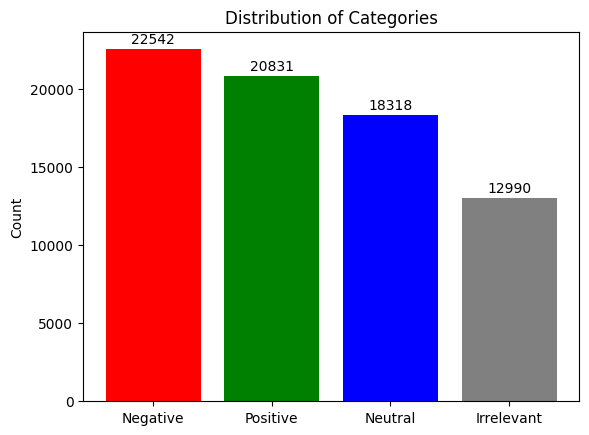

In [17]:
import matplotlib.pyplot as plt

# Your data
data = {'Negative': 22542, 'Positive': 20831, 'Neutral': 18318, 'Irrelevant': 12990}

# Plotting
fig, ax = plt.subplots()
ax.bar(data.keys(), data.values(), color=['red', 'green', 'blue', 'gray'])
ax.set_ylabel('Count')
ax.set_title('Distribution of Categories')

# Display the count values on top of the bars
for key, value in data.items():
    ax.text(key, value + 200, str(value), ha='center', va='bottom')

plt.show()


# Preprocessing text

In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
nltk.download('stopwords')
nltk.download('punkt')
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and links
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization and removing stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)


[nltk_data] Downloading package stopwords to D:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to D:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Apply the preprocess_text function to the 'review' column

In [19]:

tdf['preprocessed_text'] = tdf['review'].apply(preprocess_text)
tdf

,id,info,type,review,preprocessed_text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands murder
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting borderlands murder
...,...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,realized windows partition mac like years behi...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,realized mac window partition years behind nvi...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,realized windows partition mac years behind nv...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,realized windows partition mac like years behi...


In [20]:
vdf['preprocessed_text'] = vdf['review'].apply(preprocess_text)
vdf

,id,info,type,review,preprocessed_text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects claims...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft pay word functions poorly samsungus ...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...
3,4433,Google,Neutral,Now the President is slapping Americans in the...,president slapping americans face really commi...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,hi eahelp ive madeleine mccann cellar past yea...
...,...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,toronto arts culture capital canada wonder wan...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,actually good move tot bring viewers one peopl...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,today sucked time drink wine n play borderland...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,bought fraction microsoft today small wins


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer



# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
# Fit and transform the training data
tfidf_train_features = tfidf_vectorizer.fit_transform(tdf['preprocessed_text'])

# Transform the validation data using the same vectorizer
tfidf_validation_features = tfidf_vectorizer.transform(vdf['preprocessed_text'])

# Display the shape of the TF-IDF features
print(f"TF-IDF Training Features Shape: {tfidf_train_features.shape}")
print(f"TF-IDF Validation Features Shape: {tfidf_validation_features.shape}")

TF-IDF Training Features Shape: (73995, 5000)
TF-IDF Validation Features Shape: (999, 5000)


In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Instantiate the Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Train the model on the training data
nb_model.fit(tfidf_train_features, tdf['type'])

# Make predictions on the validation data
nb_predictions = nb_model.predict(tfidf_validation_features)

# Evaluate the performance of the Naive Bayes model
accuracy = accuracy_score(vdf['type'], nb_predictions)
report = classification_report(vdf['type'], nb_predictions)

print(f"Naive Bayes Accuracy: {accuracy}")
print("Naive Bayes Classification Report:\n", report)


Naive Bayes Accuracy: 0.7137137137137137
Naive Bayes Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.82      0.53      0.65       171
    Negative       0.65      0.84      0.73       266
     Neutral       0.80      0.58      0.67       285
    Positive       0.69      0.84      0.76       277

    accuracy                           0.71       999
   macro avg       0.74      0.70      0.70       999
weighted avg       0.73      0.71      0.71       999



In [28]:
from sklearn.model_selection import GridSearchCV

# Example grid search for hyperparameter tuning
param_grid = {'alpha': [0.1, 0.5, 1.0]}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5)
grid_search.fit(tfidf_train_features, tdf['type'])

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_nb_model = grid_search.best_estimator_

# Make predictions on the validation set using the best Naive Bayes model
best_nb_predictions = best_nb_model.predict(tfidf_validation_features)

# Evaluate the performance of the best Naive Bayes model
best_accuracy = accuracy_score(vdf['type'], best_nb_predictions)
best_report = classification_report(vdf['type'], best_nb_predictions)

print(f"Best Naive Bayes Accuracy: {best_accuracy}")
print("Best Naive Bayes Classification Report:\n", best_report)


Best Naive Bayes Accuracy: 0.7137137137137137
Best Naive Bayes Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.82      0.53      0.65       171
    Negative       0.65      0.84      0.73       266
     Neutral       0.80      0.58      0.67       285
    Positive       0.69      0.84      0.76       277

    accuracy                           0.71       999
   macro avg       0.74      0.70      0.70       999
weighted avg       0.73      0.71      0.71       999



In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Feature engineering and TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_train_features = tfidf_vectorizer.fit_transform(tdf['preprocessed_text'])
tfidf_validation_features = tfidf_vectorizer.transform(vdf['preprocessed_text'])


Best Naive Bayes Accuracy: 0.7267267267267268
Best Naive Bayes Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.64      0.75      0.69       171
    Negative       0.74      0.79      0.76       266
     Neutral       0.78      0.59      0.67       285
    Positive       0.74      0.79      0.76       277

    accuracy                           0.73       999
   macro avg       0.72      0.73      0.72       999
weighted avg       0.73      0.73      0.72       999



In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Feature engineering and TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_train_features = tfidf_vectorizer.fit_transform(tdf['preprocessed_text'])
tfidf_validation_features = tfidf_vectorizer.transform(vdf['preprocessed_text'])

# Oversampling using SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
tfidf_train_resampled, tdf_resampled_target = smote.fit_resample(tfidf_train_features, tdf['type'])

# Hyperparameter tuning with cross-validation
param_grid = {'alpha': [0.1, 0.5, 1.0]}
nb_model = MultinomialNB()
grid_search = GridSearchCV(nb_model, param_grid, cv=5)
grid_search.fit(tfidf_train_resampled, tdf_resampled_target)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_nb_model = grid_search.best_estimator_

# Make predictions on the validation set using the best Naive Bayes model
best_nb_predictions = best_nb_model.predict(tfidf_validation_features)

# Evaluate the performance of the best Naive Bayes model
best_accuracy = accuracy_score(vdf['type'], best_nb_predictions)
best_report = classification_report(vdf['type'], best_nb_predictions)

print(f"Best Naive Bayes Accuracy: {best_accuracy}")
print("Best Naive Bayes Classification Report:\n", best_report)


Best Naive Bayes Accuracy: 0.7267267267267268
Best Naive Bayes Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.64      0.75      0.69       171
    Negative       0.74      0.79      0.76       266
     Neutral       0.78      0.59      0.67       285
    Positive       0.74      0.79      0.76       277

    accuracy                           0.73       999
   macro avg       0.72      0.73      0.72       999
weighted avg       0.73      0.73      0.72       999



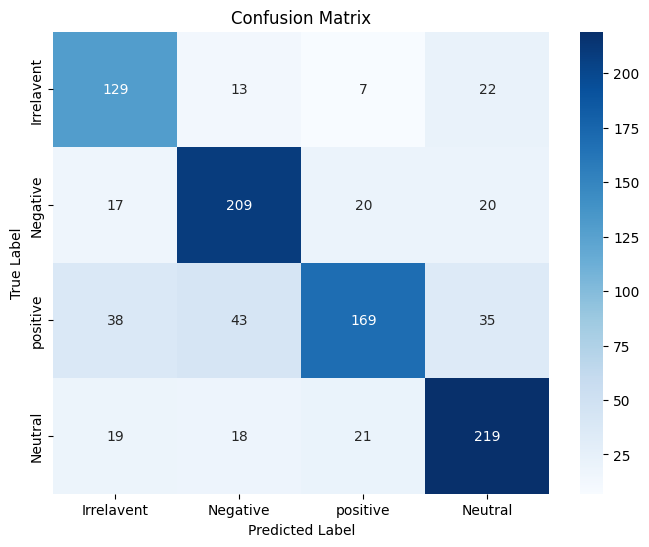

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(vdf['type'], best_nb_predictions)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Irrelavent','Negative', 'positive','Neutral'], yticklabels=['Irrelavent','Negative', 'positive','Neutral'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [46]:
import joblib
# Save the TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, 'vectorizer1.joblib')


['vectorizer1.joblib']

# Save the trained Naive Bayes model to the file

In [45]:
joblib.dump(best_nb_model, 'naivebayes.joblib')

['naivebayes.joblib']

In [ ]:
# Example user input
user_input = "Platinum is the best loot @Borderlands"

# Preprocess the user input
user_input_processed = preprocess_text(user_input)

# Vectorize the user input using TF-IDF
user_input_tfidf = tfidf_vectorizer.transform([user_input_processed])

# Predict the sentiment type using the trained XGBoost model
prediction_encoded =best_nb_model.predict(user_input_tfidf)[0]

# Decode the predicted label back to the original class label
predicted_type = label_encoder.inverse_transform([prediction_encoded])[0]

print(f"The predicted type for the input text is: {predicted_type}")




In [57]:
import joblib

# Load the Naive Bayes model
loaded_nb_model = joblib.load('naivebayes.joblib')

# Load the TF-IDF vectorizer
loaded_tfidf_vectorizer = joblib.load('vectorizer1.joblib')

# Assuming you have a DataFrame named `unseen_df` with a column 'text_column' containing the text data
# Clean and preprocess the unseen data
user_input = "Platinum is  the best loot @Borderlands"
user_input_processed = preprocess_text(user_input)


# Use the loaded TF-IDF vectorizer to transform the unseen text data
unseen_tfidf_features = loaded_tfidf_vectorizer.transform([user_input_processed])

# Make predictions on the unseen data using the loaded Naive Bayes model
unseen_predictions = loaded_nb_model.predict(unseen_tfidf_features)

# Print the predicted target labels for the unseen data
print("Predicted Target Labels on Unseen Data:")
print(unseen_predictions)


Predicted Target Labels on Unseen Data:
['Positive']


In [58]:
import joblib

# Load the Naive Bayes model
loaded_nb_model = joblib.load('naivebayes.joblib')

# Load the TF-IDF vectorizer
loaded_tfidf_vectorizer = joblib.load('vectorizer1.joblib')

# Assuming you have a DataFrame named `unseen_df` with a column 'text_column' containing the text data
# Clean and preprocess the unseen data
user_input = "This is shitty. I get that profit-wise it was less business expected prior to a huge problem."
user_input_processed = preprocess_text(user_input)


# Use the loaded TF-IDF vectorizer to transform the unseen text data
unseen_tfidf_features = loaded_tfidf_vectorizer.transform([user_input_processed])

# Make predictions on the unseen data using the loaded Naive Bayes model
unseen_predictions = loaded_nb_model.predict(unseen_tfidf_features)

# Print the predicted target labels for the unseen data
print("Predicted Target Labels on Unseen Data:")
print(unseen_predictions)


Predicted Target Labels on Unseen Data:
['Negative']
